In [ ]:
##Step 2

In [ ]:
##Step 3

In [1]:
# Load OpenVINO model on device
compiled_model = core.compile_model(ov_model, device.value)
compiled_model

NameError: name 'core' is not defined

In [10]:
import openvino.runtime as ov
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import gradio as gr
from PIL import Image

# Load the OpenVINO model
core = ov.Core()
model_path = "production_prediction_openvino.xml"  # Ensure this path is correct
compiled_model = core.compile_model(core.read_model(model_path), "CPU")

# Initialize the fingerprint generator
fp_generator = GetMorganGenerator(radius=2, fpSize=2048)

# Define function to generate fingerprints and predict likelihood using OpenVINO
def predict_reaction_with_openvino(reactant_smiles, product_smiles):
    # Generate molecules from SMILES strings
    reactant_mol = Chem.MolFromSmiles(reactant_smiles)
    product_mol = Chem.MolFromSmiles(product_smiles)
    
    if reactant_mol is None or product_mol is None:
        return "Invalid SMILES string. Please check your input.", None, None, None

    # Generate fingerprints for reactant and product
    reactant_fp = np.array(fp_generator.GetFingerprint(reactant_mol))
    product_fp = np.array(fp_generator.GetFingerprint(product_mol))
    
    # Concatenate fingerprints for input features
    input_data = np.concatenate([reactant_fp, product_fp]).reshape(1, -1).astype(np.float32)

    # Predict likelihood using OpenVINO
    try:
        result = compiled_model([input_data])[0]
        predicted_likelihood = float(result[0])  # Convert to a Python float
    except Exception as e:
        return f"Error during prediction: {str(e)}", None, None, None

    # Additional details for interpretation
    likelihood_interpretation = "High" if predicted_likelihood > 0.7 else "Moderate" if predicted_likelihood > 0.4 else "Low"
    detailed_result = f"Predicted Likelihood: {predicted_likelihood:.4f} (Interpretation: {likelihood_interpretation})"

    # Convert molecules to images
    reactant_img = Draw.MolToImage(reactant_mol, size=(300, 300))
    product_img = Draw.MolToImage(product_mol, size=(300, 300))

    # Display the images and detailed likelihood result
    return (
        detailed_result,
        reactant_img,
        product_img,
        f"Prediction Analysis: The reaction likelihood is {likelihood_interpretation} with a score of {predicted_likelihood:.4f}."
    )

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# Reaction Prediction with SMILES Visualization using OpenVINO")

    with gr.Row():
        reactant_smiles = gr.Textbox(label="Reactant SMILES", placeholder="Enter reactant SMILES (e.g., CCO for ethanol)")
        product_smiles = gr.Textbox(label="Product SMILES", placeholder="Enter product SMILES (e.g., CCO for ethanol)")

    predict_button = gr.Button("Predict Reaction Likelihood")

    with gr.Row():
        likelihood_output = gr.Textbox(label="Predicted Reaction Likelihood")
        reactant_image = gr.Image(type="pil", label="Reactant Molecule")
        product_image = gr.Image(type="pil", label="Product Molecule")
        detailed_analysis = gr.Textbox(label="Detailed Prediction Analysis")

    predict_button.click(
        predict_reaction_with_openvino,
        inputs=[reactant_smiles, product_smiles],
        outputs=[likelihood_output, reactant_image, product_image, detailed_analysis]
    )

# Launch the Gradio app
demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://45bdb6c91a4cd9c0c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/tmp/ipykernel_1484/2684666254.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_likelihood = float(result[0])  # Convert to a Python float


In [ ]:
##Start Here New

Reactant: CC(=O)O


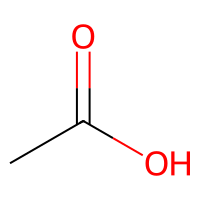

Product: CC(=O)OCC


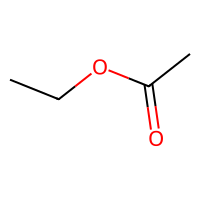

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


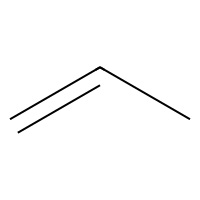

Product: CCC


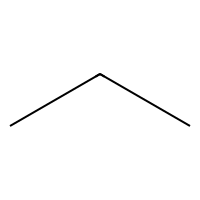

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


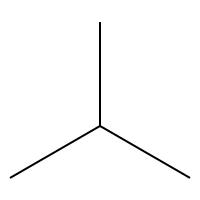

Product: CC(C)CO


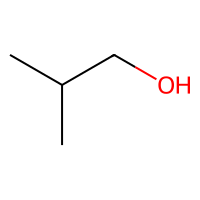

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


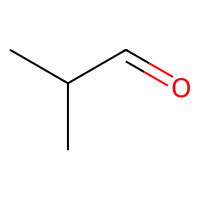

Product: CC(C)CO


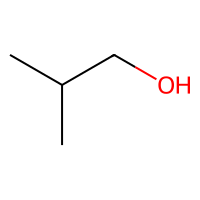

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


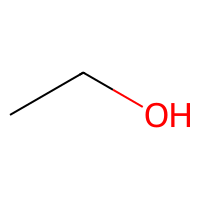

Product: CCO


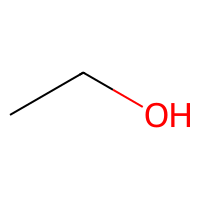

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


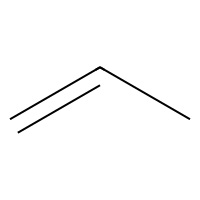

Product: CC(=O)OCC


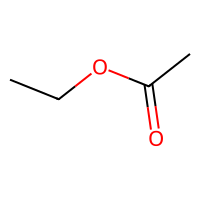

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


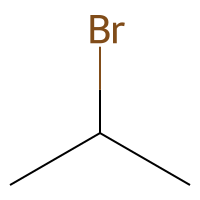

Product: CC(C)Cl


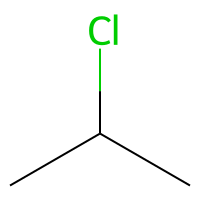

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


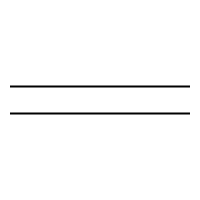

Product: CC


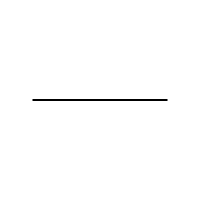

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


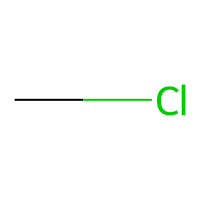

Product: CBr


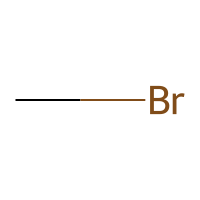

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


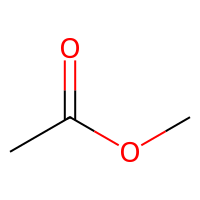

Product: CC(=O)OCC


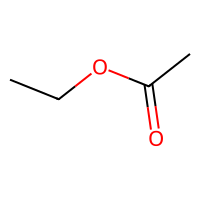

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


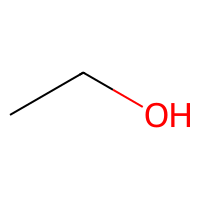

Product: CCOC(=O)C


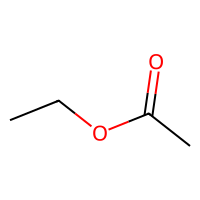

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


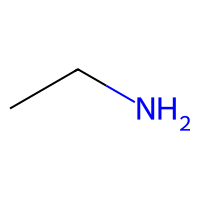

Product: CC(C)N


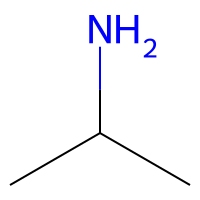

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [1/15], Loss: 1.1425
Reactant: CCN


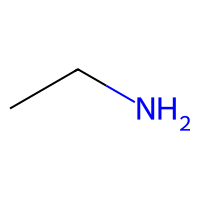

Product: CC(C)N


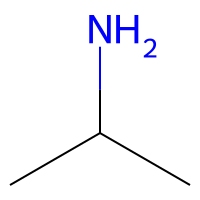

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


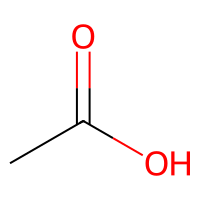

Product: CC(=O)OCC


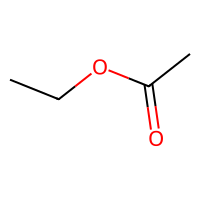

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


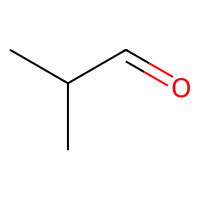

Product: CC(C)CO


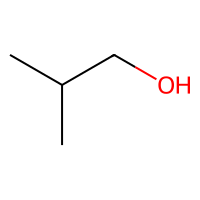

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


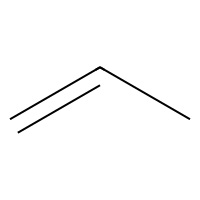

Product: CC(=O)OCC


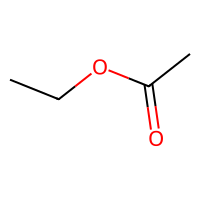

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


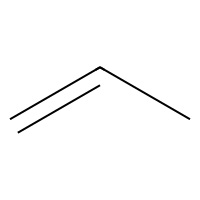

Product: CCC


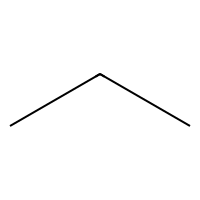

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


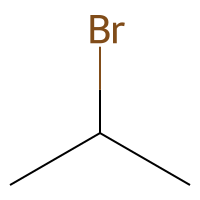

Product: CC(C)Cl


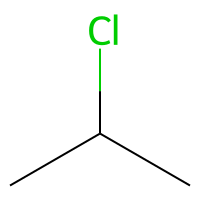

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


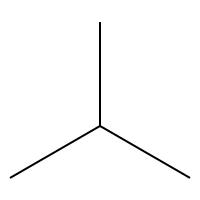

Product: CC(C)CO


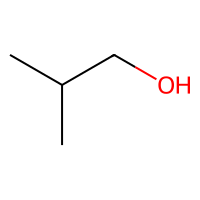

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


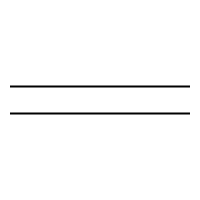

Product: CC


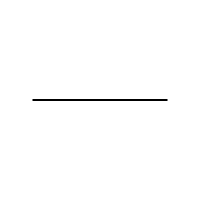

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


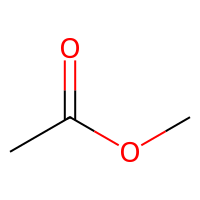

Product: CC(=O)OCC


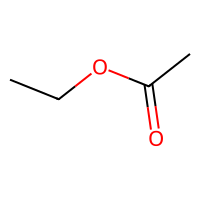

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


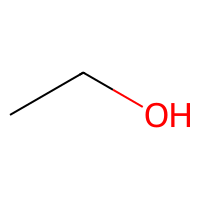

Product: CCOC(=O)C


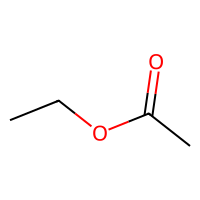

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


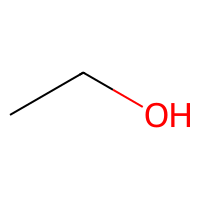

Product: CCO


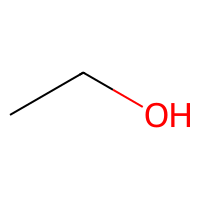

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


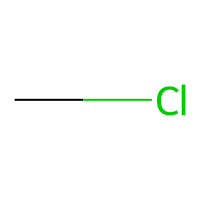

Product: CBr


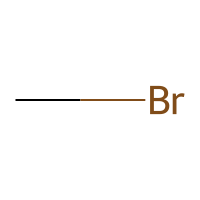

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [2/15], Loss: 0.2557
Reactant: CCN


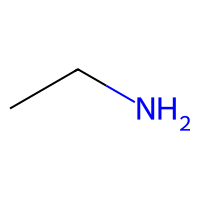

Product: CC(C)N


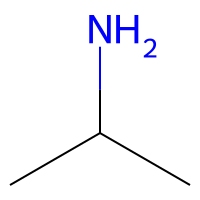

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


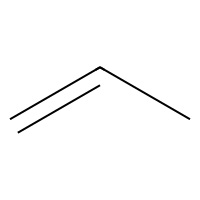

Product: CC(=O)OCC


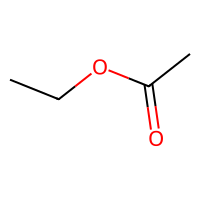

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


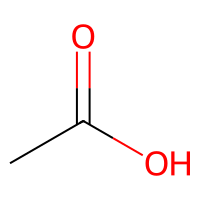

Product: CC(=O)OCC


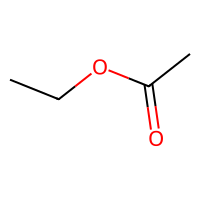

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


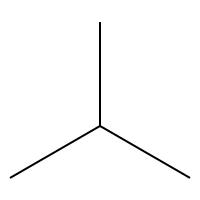

Product: CC(C)CO


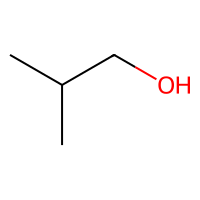

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


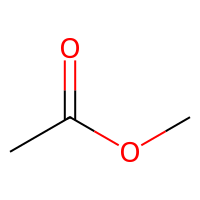

Product: CC(=O)OCC


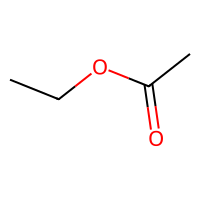

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


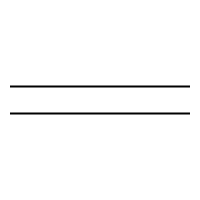

Product: CC


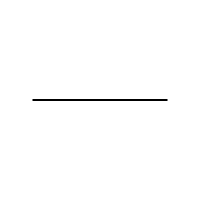

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


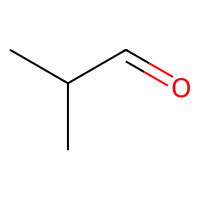

Product: CC(C)CO


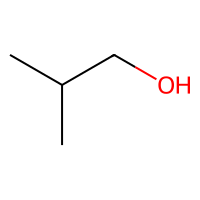

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


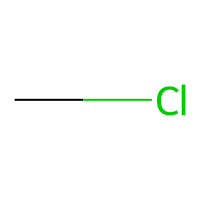

Product: CBr


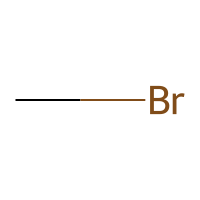

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


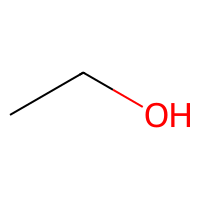

Product: CCO


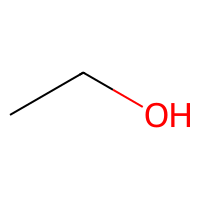

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


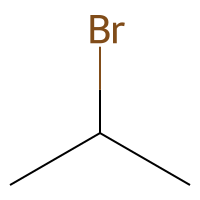

Product: CC(C)Cl


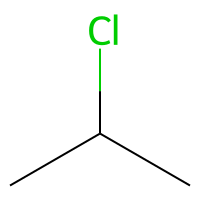

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


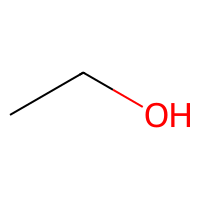

Product: CCOC(=O)C


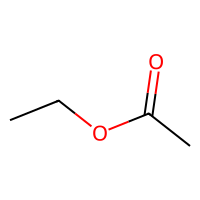

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


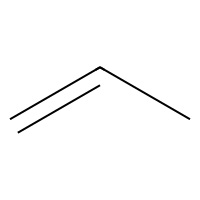

Product: CCC


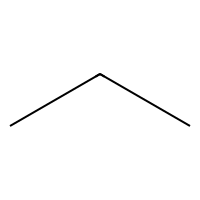

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [3/15], Loss: 0.2003
Reactant: CCl


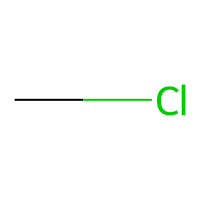

Product: CBr


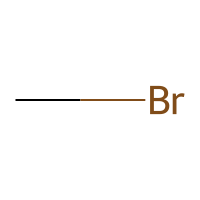

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


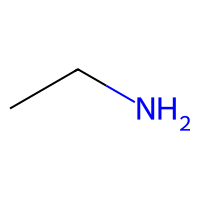

Product: CC(C)N


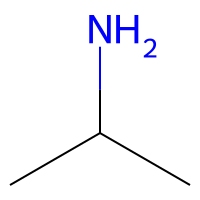

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


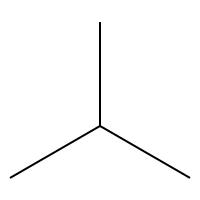

Product: CC(C)CO


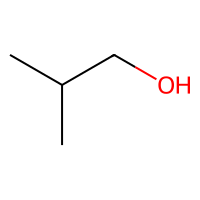

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


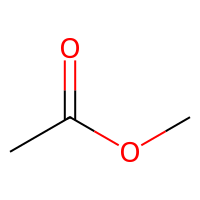

Product: CC(=O)OCC


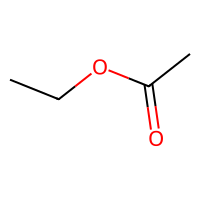

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


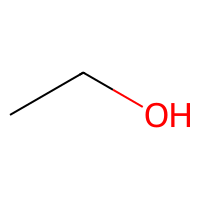

Product: CCOC(=O)C


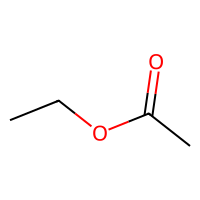

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


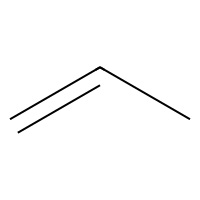

Product: CCC


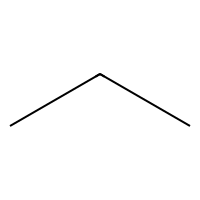

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


Traceback (most recent call last):
  File "/opt/app-root/lib64/python3.9/site-packages/torch/_inductor/compile_worker/__main__.py", line 45, in <module>
    main()
  File "/opt/app-root/lib64/python3.9/site-packages/torch/_inductor/compile_worker/__main__.py", line 38, in main
    pre_fork_setup()
  File "/opt/app-root/lib64/python3.9/site-packages/torch/_inductor/async_compile.py", line 62, in pre_fork_setup
    from triton.compiler.compiler import triton_key
ImportError: cannot import name 'triton_key' from 'triton.compiler.compiler' (/opt/app-root/lib64/python3.9/site-packages/triton/compiler/compiler.py)


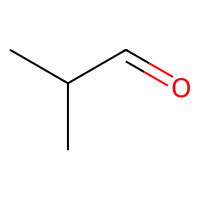

Product: CC(C)CO


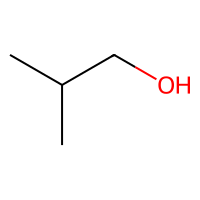

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


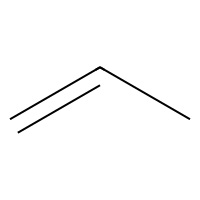

Product: CC(=O)OCC


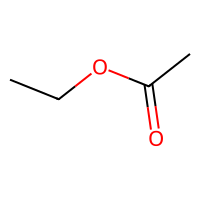

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


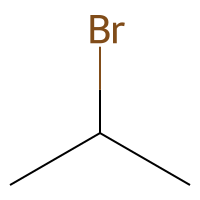

Product: CC(C)Cl


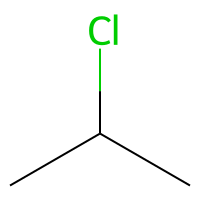

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


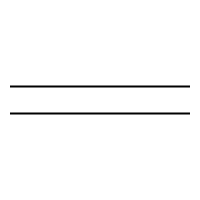

Product: CC


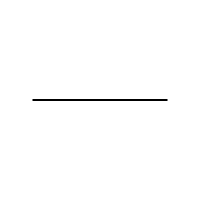

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)


W1113 20:31:21.533216 140598229894720 intel_extension_for_pytorch/utils/_logger.py:72] SubprocPool unclean exit


Reactant: CC(=O)O


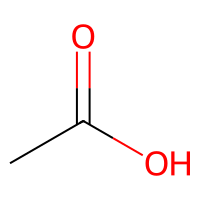

Product: CC(=O)OCC


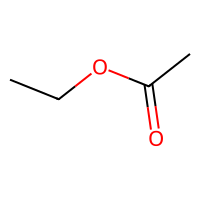

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


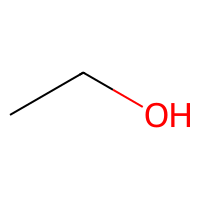

Product: CCO


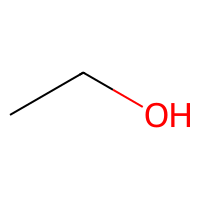

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [4/15], Loss: 0.0593
Reactant: CCl


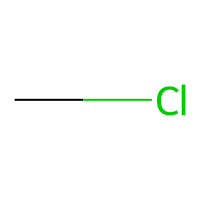

Product: CBr


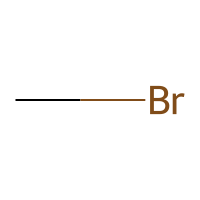

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


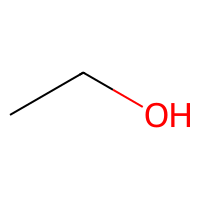

Product: CCO


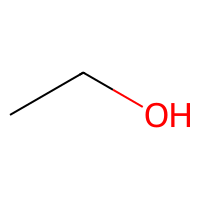

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


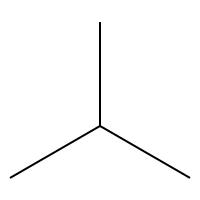

Product: CC(C)CO


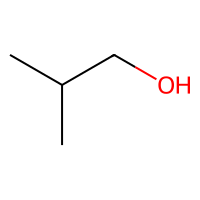

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


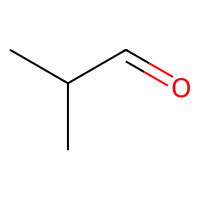

Product: CC(C)CO


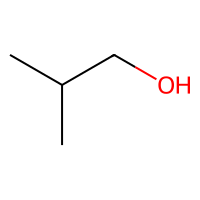

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


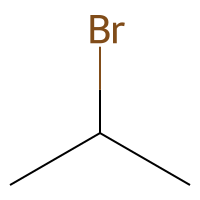

Product: CC(C)Cl


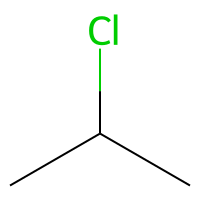

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


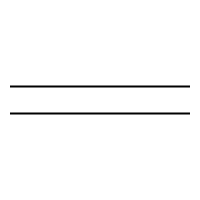

Product: CC


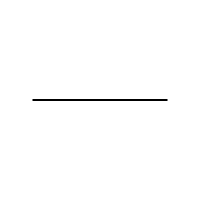

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


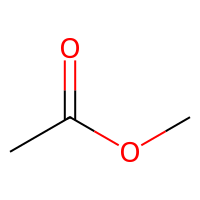

Product: CC(=O)OCC


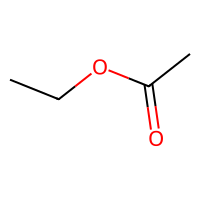

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


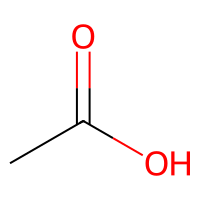

Product: CC(=O)OCC


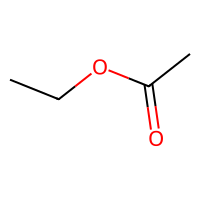

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


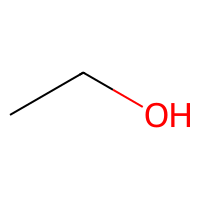

Product: CCOC(=O)C


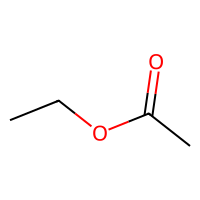

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


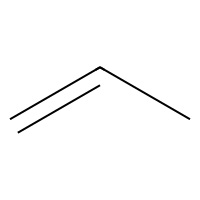

Product: CC(=O)OCC


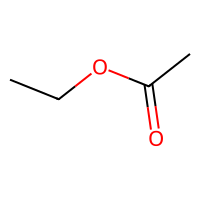

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


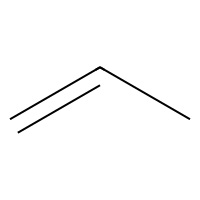

Product: CCC


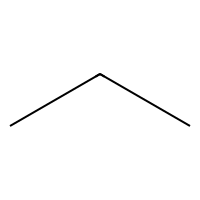

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


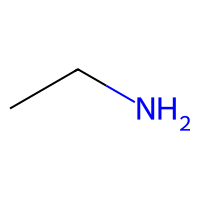

Product: CC(C)N


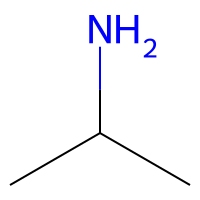

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [5/15], Loss: 0.0635
Reactant: C=CC


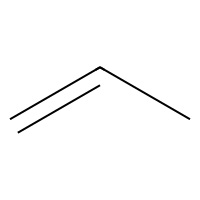

Product: CC(=O)OCC


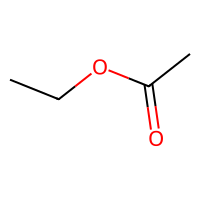

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


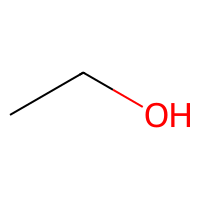

Product: CCOC(=O)C


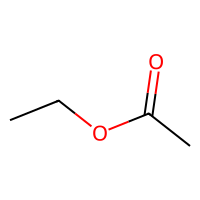

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


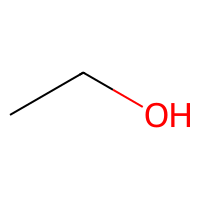

Product: CCO


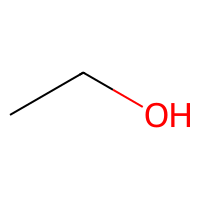

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


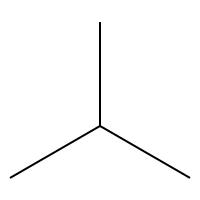

Product: CC(C)CO


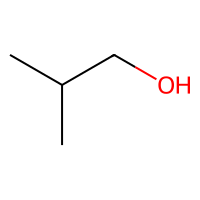

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


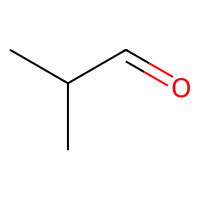

Product: CC(C)CO


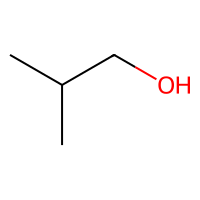

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


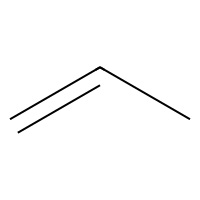

Product: CCC


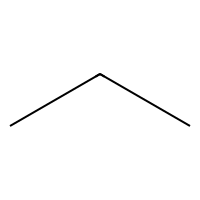

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


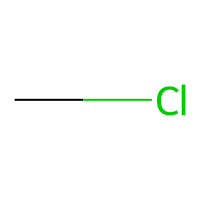

Product: CBr


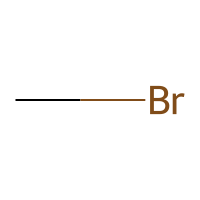

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


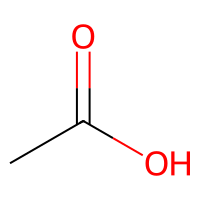

Product: CC(=O)OCC


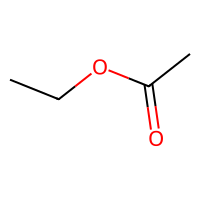

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


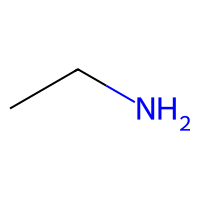

Product: CC(C)N


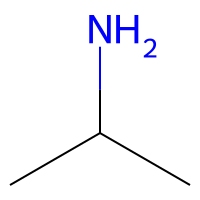

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


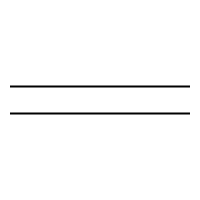

Product: CC


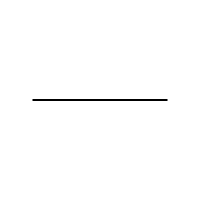

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


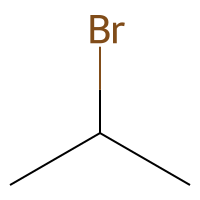

Product: CC(C)Cl


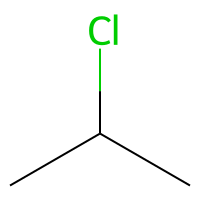

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


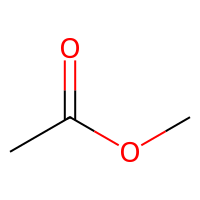

Product: CC(=O)OCC


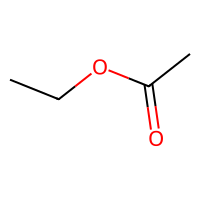

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [6/15], Loss: 0.0559
Reactant: CCO


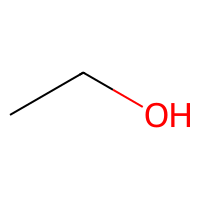

Product: CCOC(=O)C


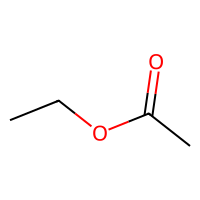

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


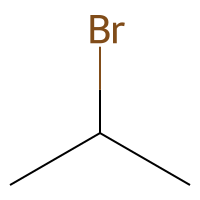

Product: CC(C)Cl


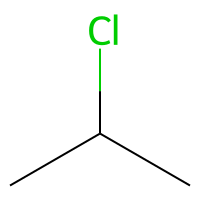

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


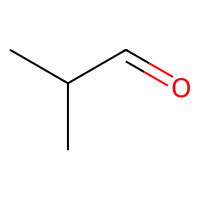

Product: CC(C)CO


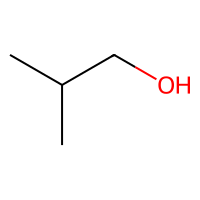

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


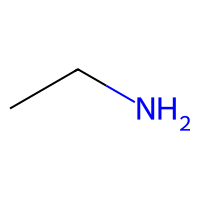

Product: CC(C)N


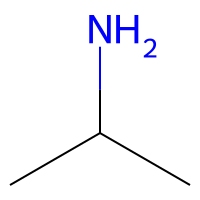

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


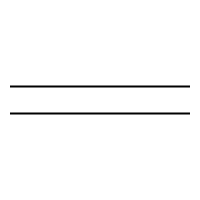

Product: CC


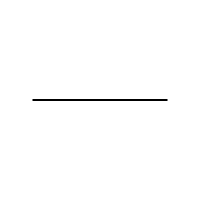

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


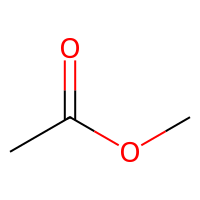

Product: CC(=O)OCC


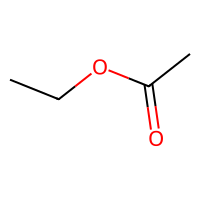

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


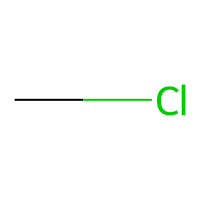

Product: CBr


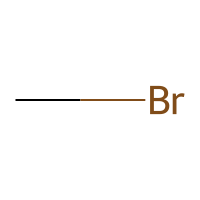

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


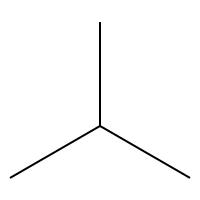

Product: CC(C)CO


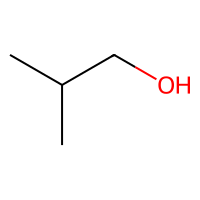

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


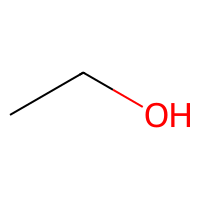

Product: CCO


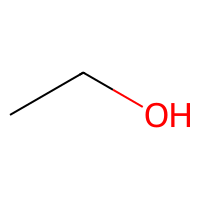

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


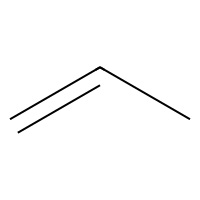

Product: CCC


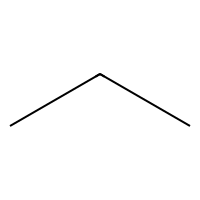

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


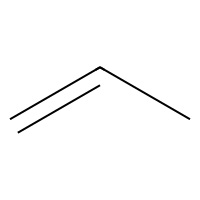

Product: CC(=O)OCC


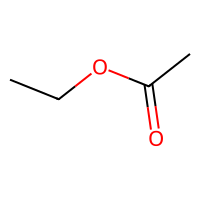

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


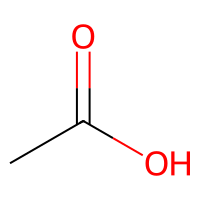

Product: CC(=O)OCC


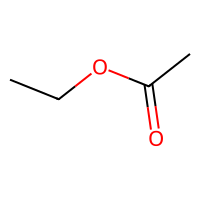

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [7/15], Loss: 0.0385
Reactant: CC(C)Br


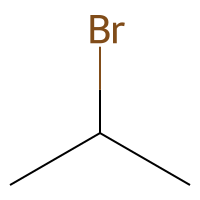

Product: CC(C)Cl


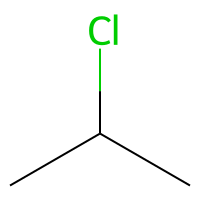

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


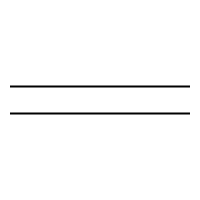

Product: CC


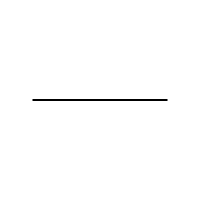

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


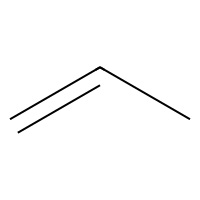

Product: CCC


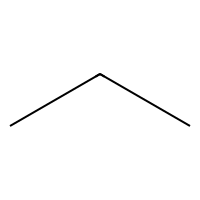

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


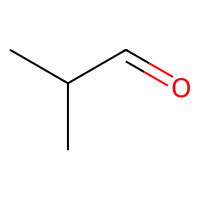

Product: CC(C)CO


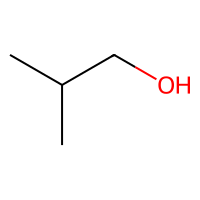

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


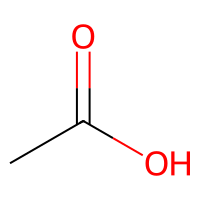

Product: CC(=O)OCC


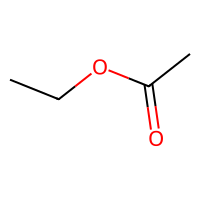

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


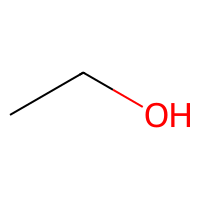

Product: CCOC(=O)C


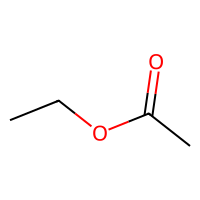

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


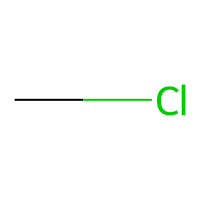

Product: CBr


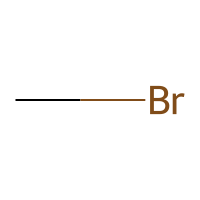

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


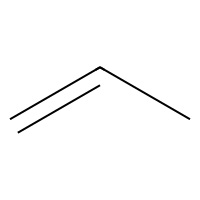

Product: CC(=O)OCC


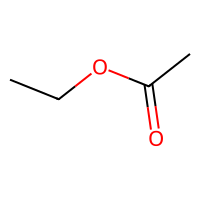

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


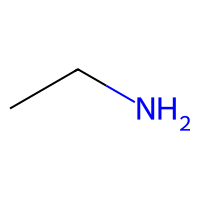

Product: CC(C)N


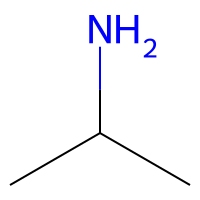

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


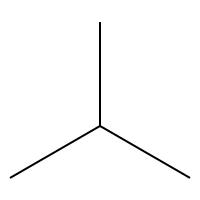

Product: CC(C)CO


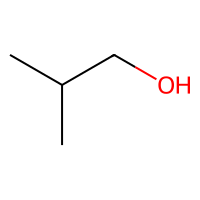

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


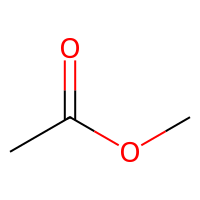

Product: CC(=O)OCC


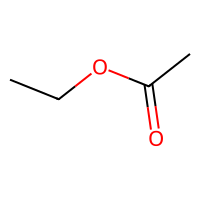

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


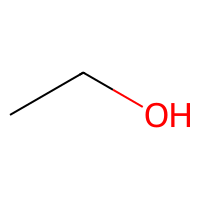

Product: CCO


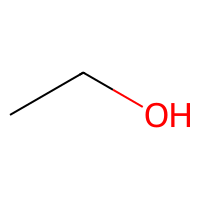

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [8/15], Loss: 0.0317
Reactant: CCN


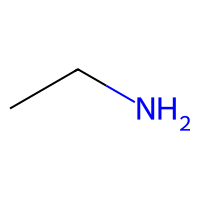

Product: CC(C)N


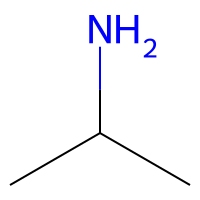

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


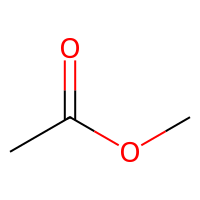

Product: CC(=O)OCC


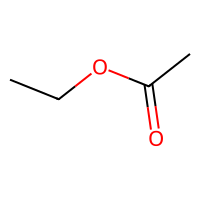

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


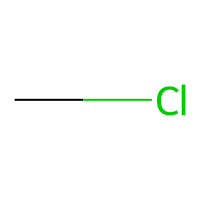

Product: CBr


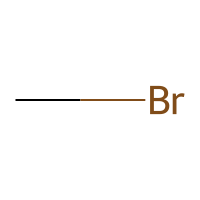

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


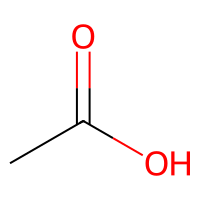

Product: CC(=O)OCC


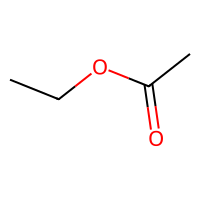

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


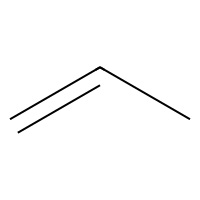

Product: CCC


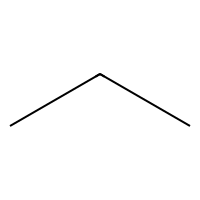

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


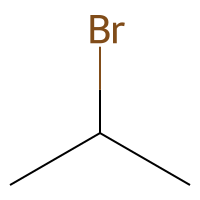

Product: CC(C)Cl


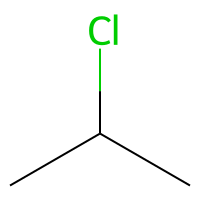

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


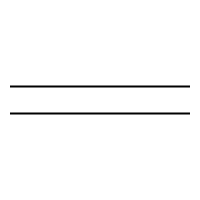

Product: CC


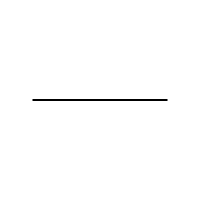

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


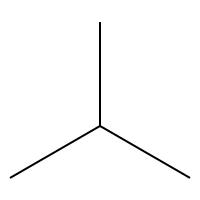

Product: CC(C)CO


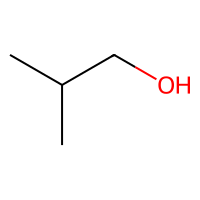

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


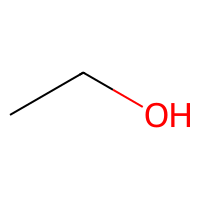

Product: CCOC(=O)C


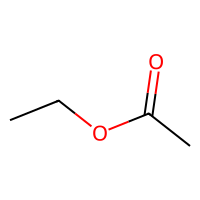

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


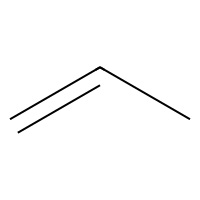

Product: CC(=O)OCC


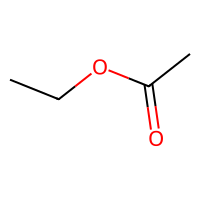

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


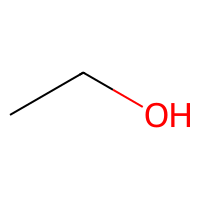

Product: CCO


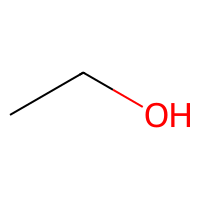

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


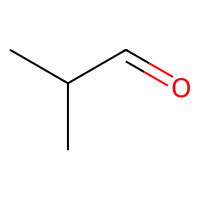

Product: CC(C)CO


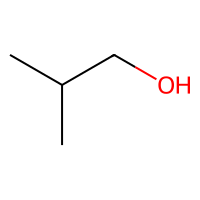

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [9/15], Loss: 0.0028
Reactant: C=CC


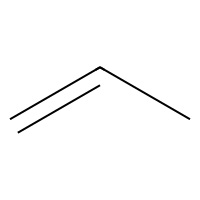

Product: CC(=O)OCC


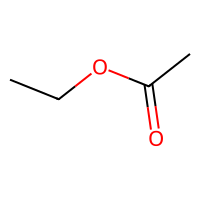

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


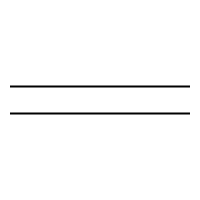

Product: CC


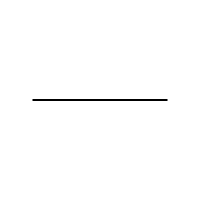

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


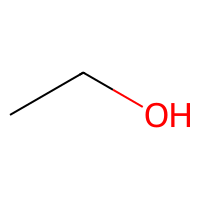

Product: CCOC(=O)C


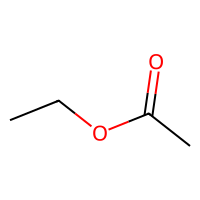

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


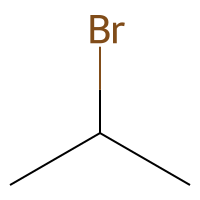

Product: CC(C)Cl


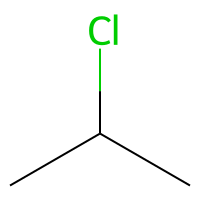

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


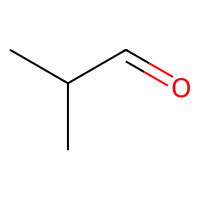

Product: CC(C)CO


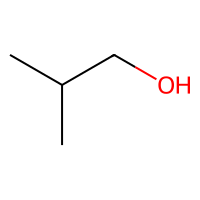

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


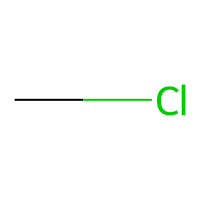

Product: CBr


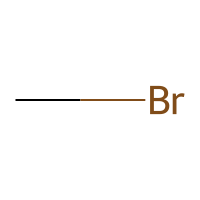

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


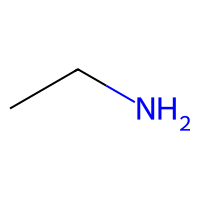

Product: CC(C)N


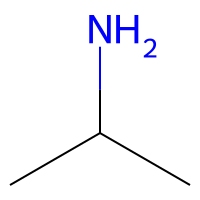

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


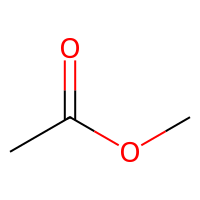

Product: CC(=O)OCC


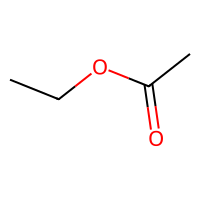

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


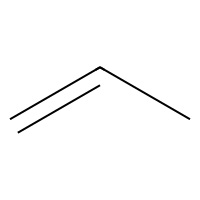

Product: CCC


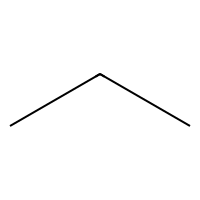

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


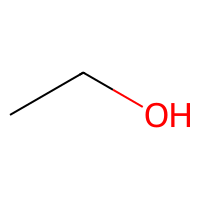

Product: CCO


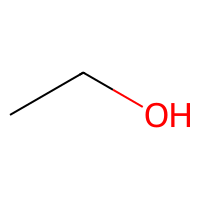

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


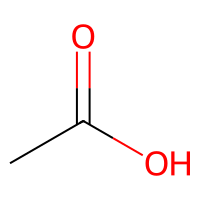

Product: CC(=O)OCC


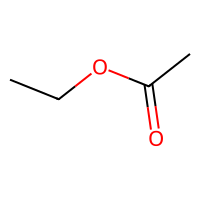

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


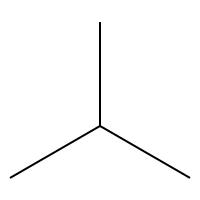

Product: CC(C)CO


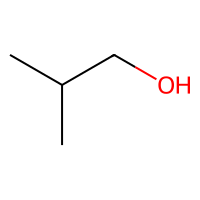

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [10/15], Loss: 0.0043
Reactant: C=C


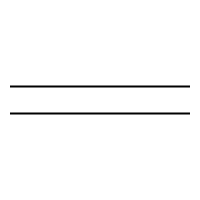

Product: CC


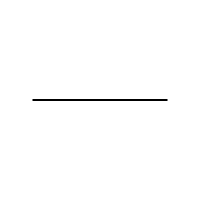

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


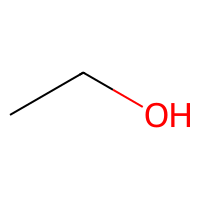

Product: CCOC(=O)C


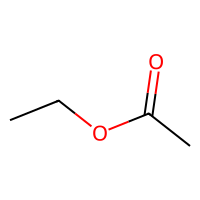

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


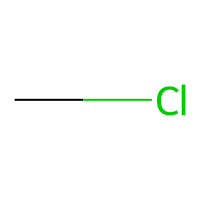

Product: CBr


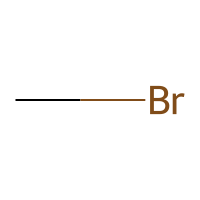

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


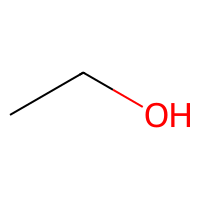

Product: CCO


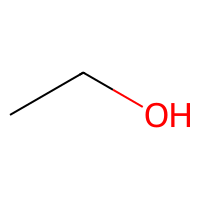

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


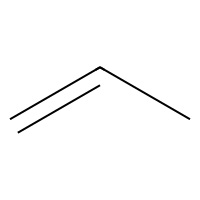

Product: CC(=O)OCC


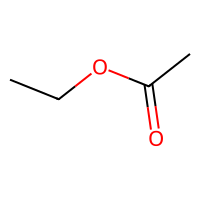

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


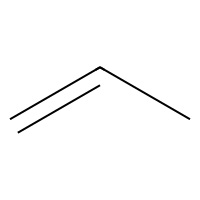

Product: CCC


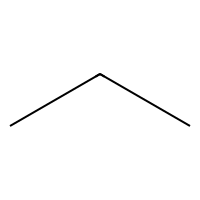

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


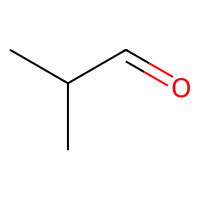

Product: CC(C)CO


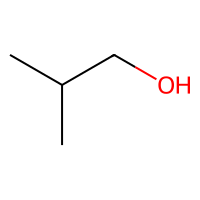

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


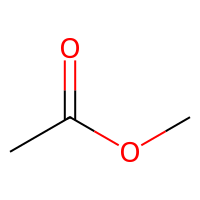

Product: CC(=O)OCC


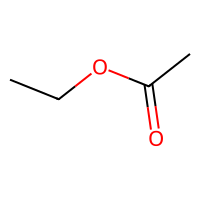

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


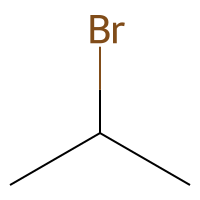

Product: CC(C)Cl


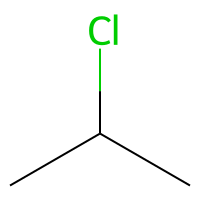

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


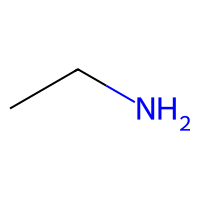

Product: CC(C)N


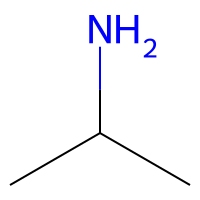

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


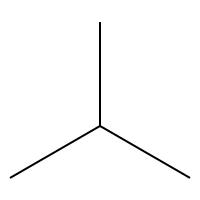

Product: CC(C)CO


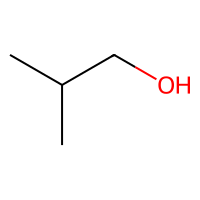

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


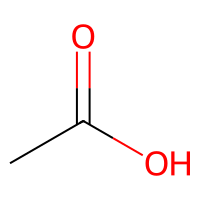

Product: CC(=O)OCC


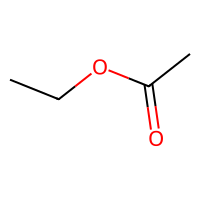

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [11/15], Loss: 0.0078
Reactant: CC(C)C


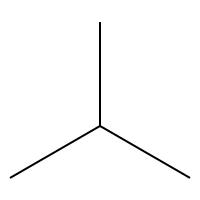

Product: CC(C)CO


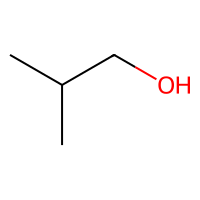

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


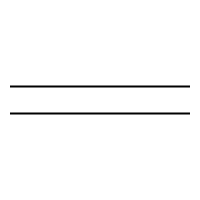

Product: CC


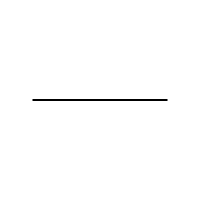

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


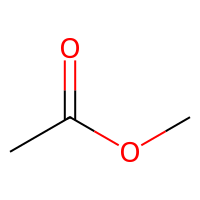

Product: CC(=O)OCC


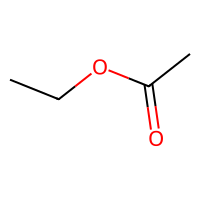

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


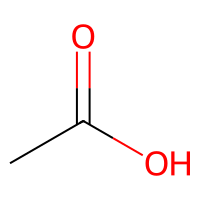

Product: CC(=O)OCC


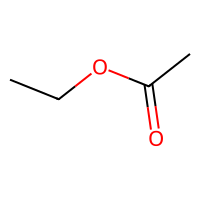

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


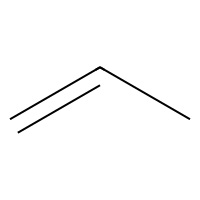

Product: CCC


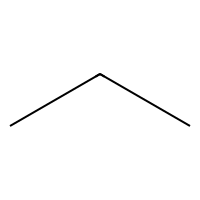

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


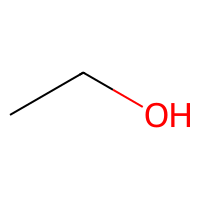

Product: CCO


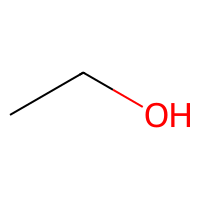

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


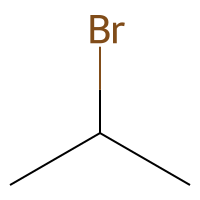

Product: CC(C)Cl


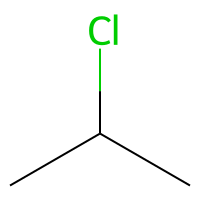

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


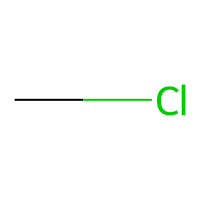

Product: CBr


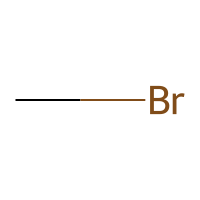

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


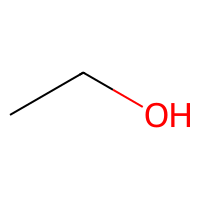

Product: CCOC(=O)C


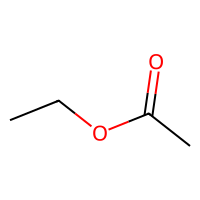

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


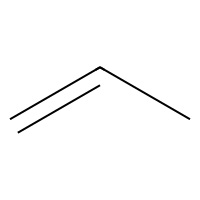

Product: CC(=O)OCC


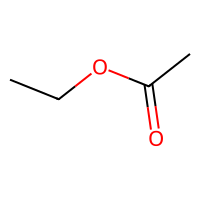

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


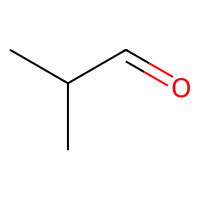

Product: CC(C)CO


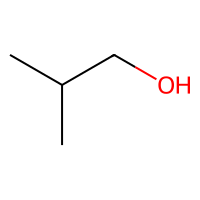

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


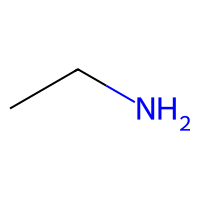

Product: CC(C)N


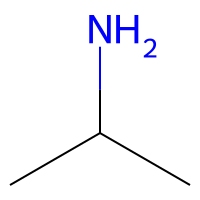

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [12/15], Loss: 0.0079
Reactant: CCO


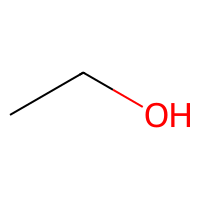

Product: CCOC(=O)C


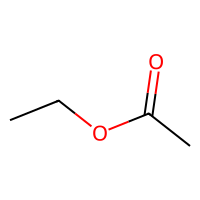

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


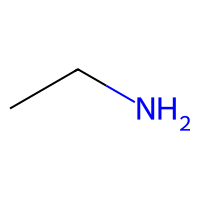

Product: CC(C)N


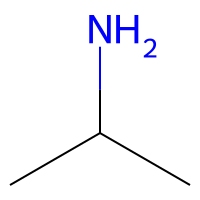

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


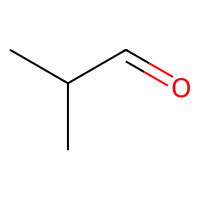

Product: CC(C)CO


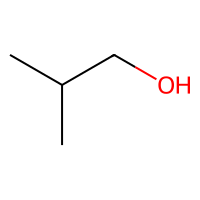

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


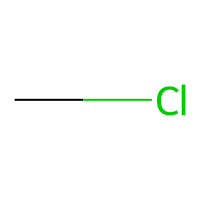

Product: CBr


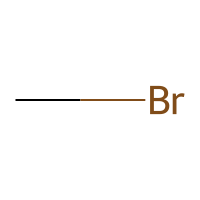

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


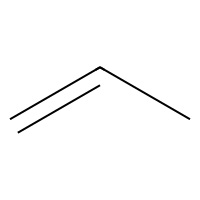

Product: CCC


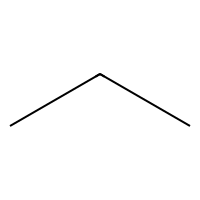

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


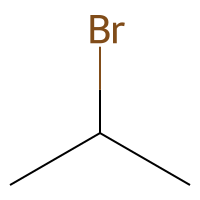

Product: CC(C)Cl


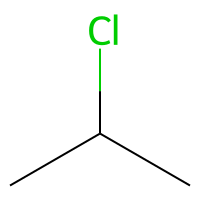

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


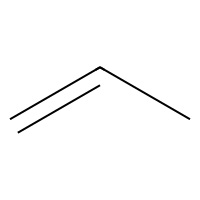

Product: CC(=O)OCC


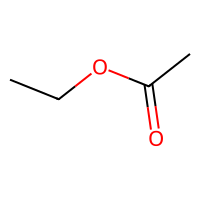

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


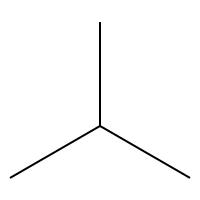

Product: CC(C)CO


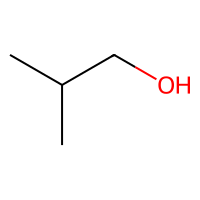

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


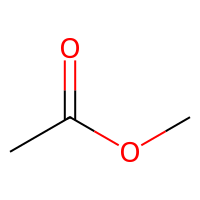

Product: CC(=O)OCC


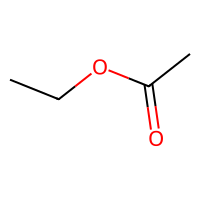

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


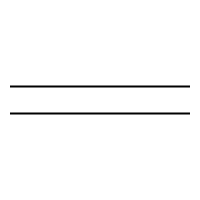

Product: CC


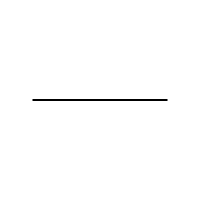

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


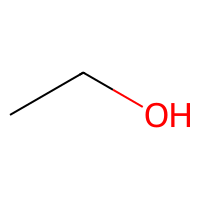

Product: CCO


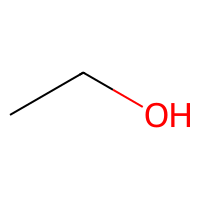

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


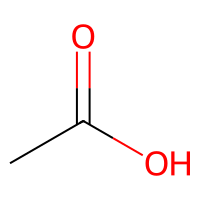

Product: CC(=O)OCC


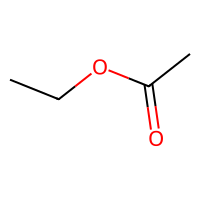

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [13/15], Loss: 0.0065
Reactant: CC(=O)OC


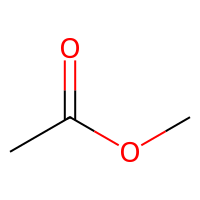

Product: CC(=O)OCC


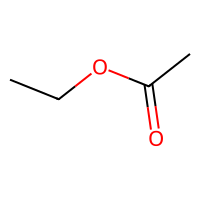

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


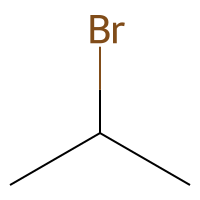

Product: CC(C)Cl


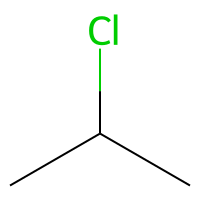

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


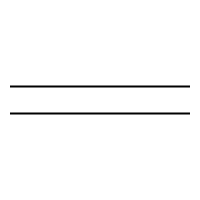

Product: CC


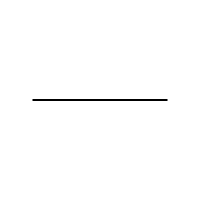

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


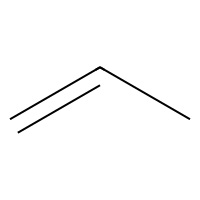

Product: CC(=O)OCC


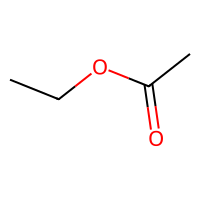

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


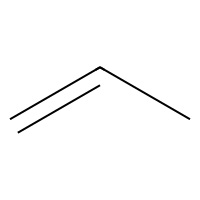

Product: CCC


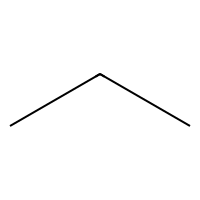

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


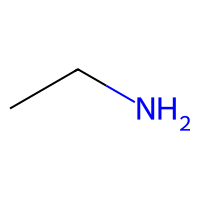

Product: CC(C)N


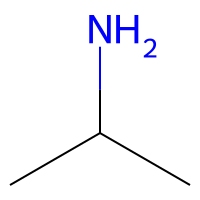

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


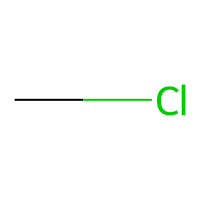

Product: CBr


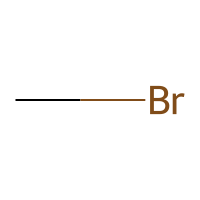

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


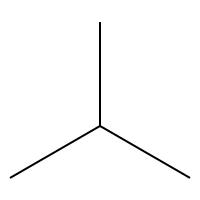

Product: CC(C)CO


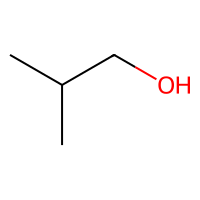

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


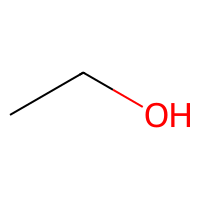

Product: CCO


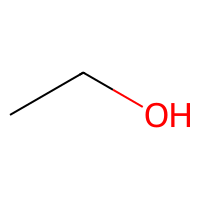

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


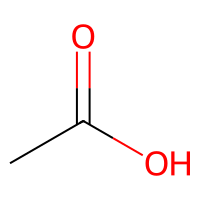

Product: CC(=O)OCC


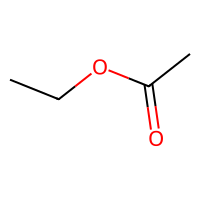

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


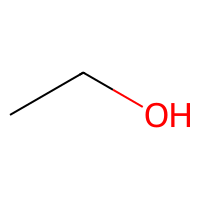

Product: CCOC(=O)C


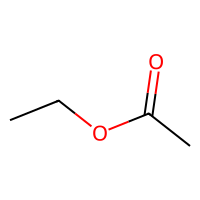

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


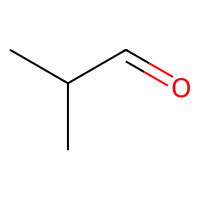

Product: CC(C)CO


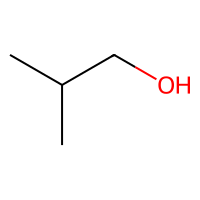

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [14/15], Loss: 0.0114
Reactant: CCO


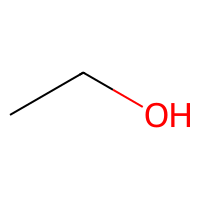

Product: CCOC(=O)C


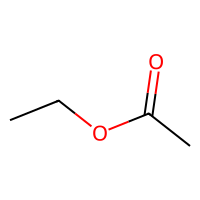

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


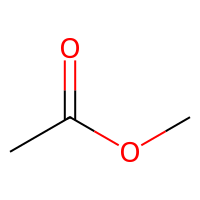

Product: CC(=O)OCC


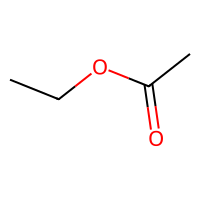

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


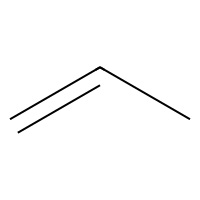

Product: CC(=O)OCC


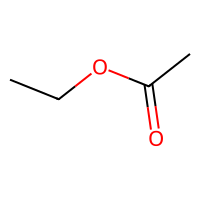

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


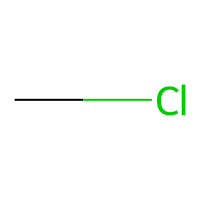

Product: CBr


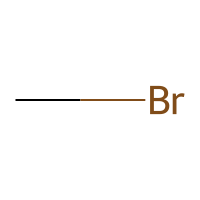

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


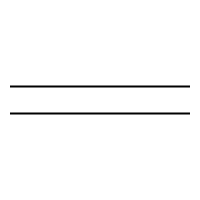

Product: CC


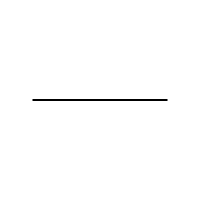

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


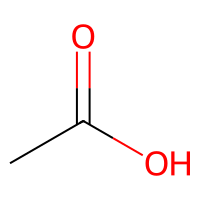

Product: CC(=O)OCC


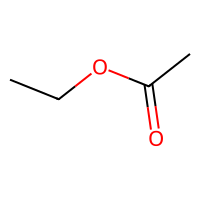

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


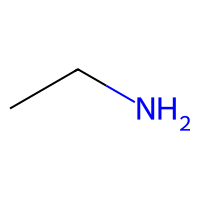

Product: CC(C)N


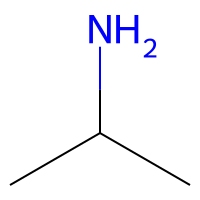

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


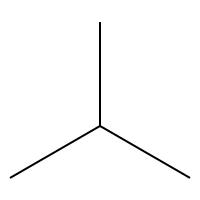

Product: CC(C)CO


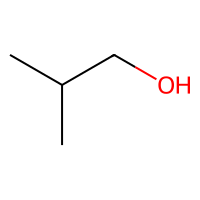

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


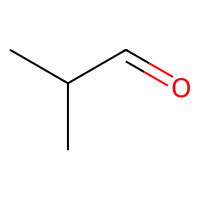

Product: CC(C)CO


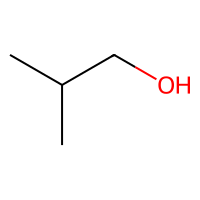

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


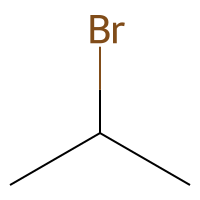

Product: CC(C)Cl


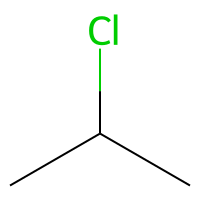

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


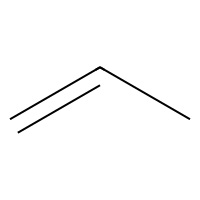

Product: CCC


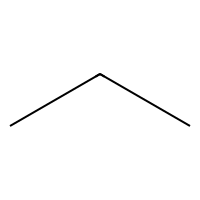

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


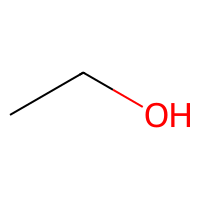

Product: CCO


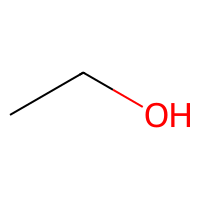

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Epoch [15/15], Loss: 0.0144
\nVisualizing Predictions on Dataset:
Reactant: CCO


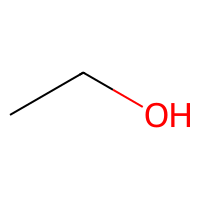

Product: CCO


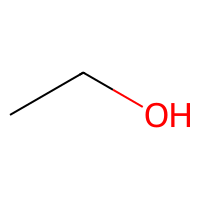

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


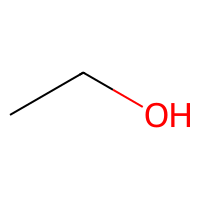

Product: CCO


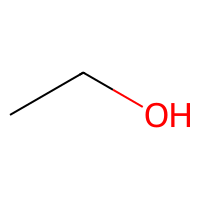

True Likelihood: 0.8999999761581421, Predicted Likelihood: 0.9914\n
Reactant: CCl


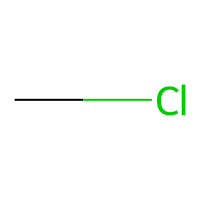

Product: CBr


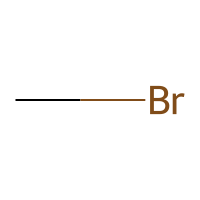

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCl


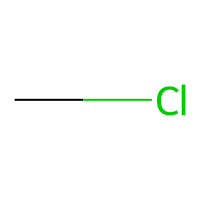

Product: CBr


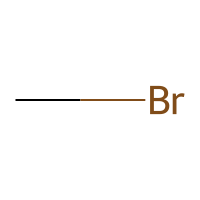

True Likelihood: 0.800000011920929, Predicted Likelihood: 0.9066\n
Reactant: C=CC


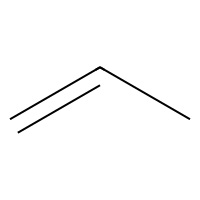

Product: CC(=O)OCC


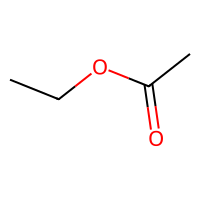

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


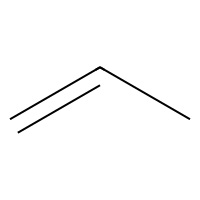

Product: CC(=O)OCC


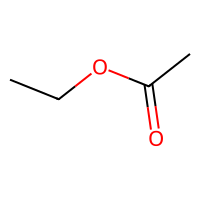

True Likelihood: 0.949999988079071, Predicted Likelihood: 0.9505\n
Reactant: C=CC


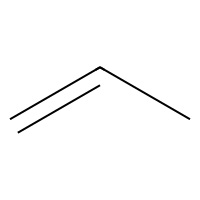

Product: CCC


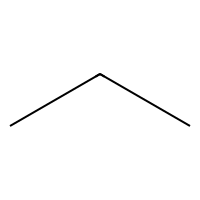

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=CC


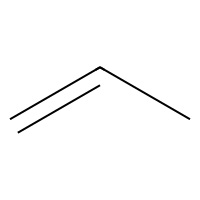

Product: CCC


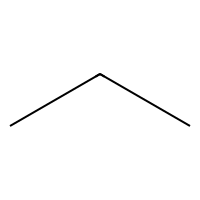

True Likelihood: 0.8999999761581421, Predicted Likelihood: 0.9227\n
Reactant: CC(C)C=O


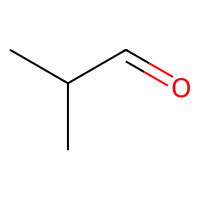

Product: CC(C)CO


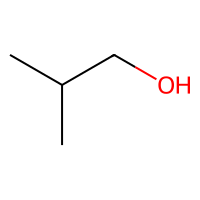

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C=O


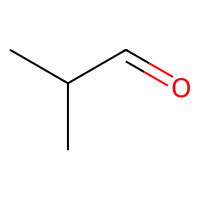

Product: CC(C)CO


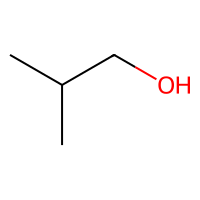

True Likelihood: 0.9200000166893005, Predicted Likelihood: 1.1692\n
Reactant: CCO


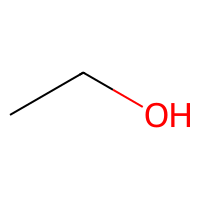

Product: CCOC(=O)C


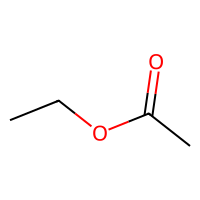

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCO


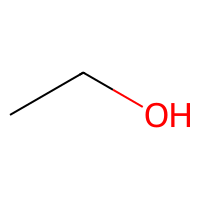

Product: CCOC(=O)C


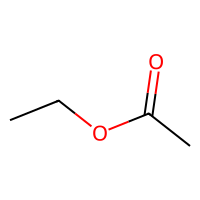

True Likelihood: 0.8799999952316284, Predicted Likelihood: 1.0107\n
Reactant: CC(=O)O


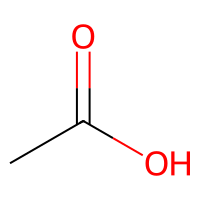

Product: CC(=O)OCC


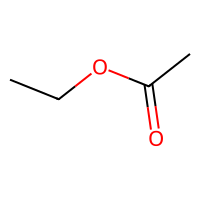

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)O


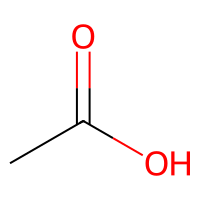

Product: CC(=O)OCC


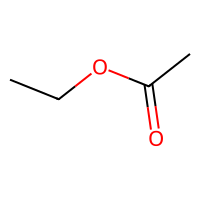

True Likelihood: 0.9300000071525574, Predicted Likelihood: 1.1564\n
Reactant: CC(=O)OC


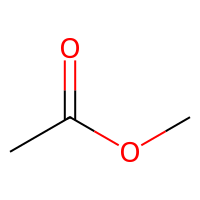

Product: CC(=O)OCC


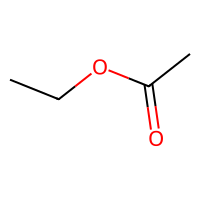

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(=O)OC


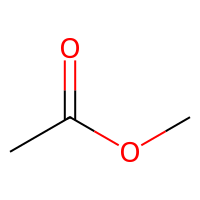

Product: CC(=O)OCC


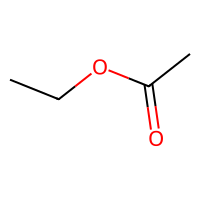

True Likelihood: 0.8999999761581421, Predicted Likelihood: 1.0170\n
Reactant: CC(C)Br


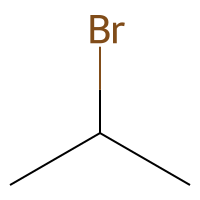

Product: CC(C)Cl


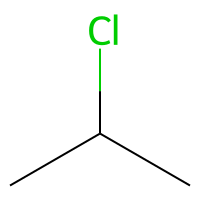

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)Br


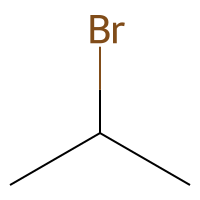

Product: CC(C)Cl


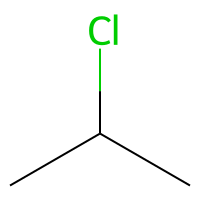

True Likelihood: 0.800000011920929, Predicted Likelihood: 0.8549\n
Reactant: CCN


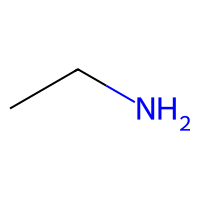

Product: CC(C)N


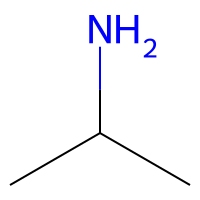

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CCN


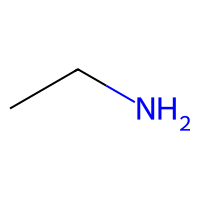

Product: CC(C)N


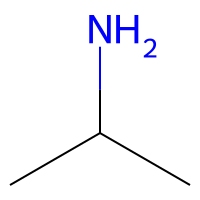

True Likelihood: 0.8500000238418579, Predicted Likelihood: 0.9684\n
Reactant: CC(C)C


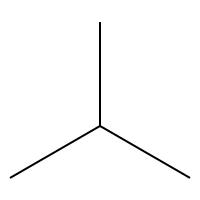

Product: CC(C)CO


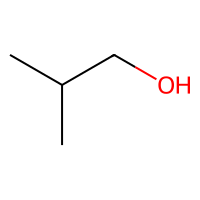

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: CC(C)C


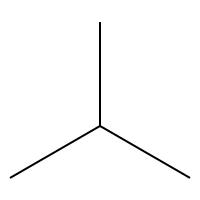

Product: CC(C)CO


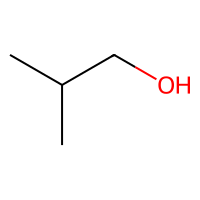

True Likelihood: 0.8700000047683716, Predicted Likelihood: 1.0097\n
Reactant: C=C


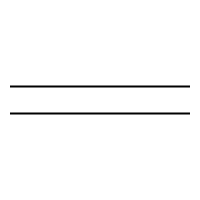

Product: CC


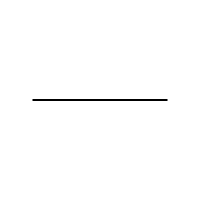

Reactant FP Shape: (4096,)
Product FP Shape: (4096,)
Concatenated Feature Vector Shape: (8192,)
Reactant: C=C


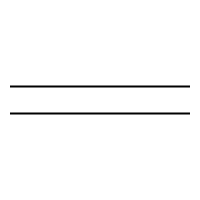

Product: CC


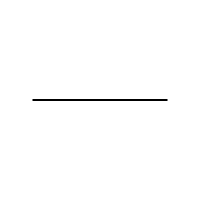

True Likelihood: 0.9100000262260437, Predicted Likelihood: 0.9696\n


In [2]:
import torch
import torch.nn as nn
import intel_extension_for_pytorch as ipex  # Import IPEX
import numpy as np
from torch.utils.data import DataLoader, Dataset
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from IPython.display import display

# Custom dataset for reaction product prediction with visualization
class ReactionDataset(Dataset):
    def __init__(self, reactions):
        self.reactions = reactions
        self.fp_generator = GetMorganGenerator(radius=3, fpSize=4096)  # Ensure fpSize is 4096 for each fingerprint

    def __len__(self):
        return len(self.reactions)
    
    def __getitem__(self, idx):
        reactant_smiles, product_smiles, likelihood = self.reactions[idx]
        
        # Generate molecules from SMILES and handle parsing errors
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)
        product_mol = Chem.MolFromSmiles(product_smiles)
        
        if reactant_mol is None or product_mol is None:
            return None  # Skip invalid SMILES
        
        # Visualize reactant and product molecules
        print(f"Reactant: {reactant_smiles}")
        display(Draw.MolToImage(reactant_mol, size=(200, 200)))
        
        print(f"Product: {product_smiles}")
        display(Draw.MolToImage(product_mol, size=(200, 200)))

        # Generate fingerprints using MorganGenerator
        reactant_fp = np.array(self.fp_generator.GetFingerprint(reactant_mol), dtype=np.int8)  # Ensure size is 4096
        product_fp = np.array(self.fp_generator.GetFingerprint(product_mol), dtype=np.int8)    # Ensure size is 4096

        # Print shapes for debugging
        print("Reactant FP Shape:", reactant_fp.shape)
        print("Product FP Shape:", product_fp.shape)
        
        # Concatenate fingerprints as input features
        features = np.concatenate([reactant_fp, product_fp])
        print("Concatenated Feature Vector Shape:", features.shape)  # Should be (8192,)
        
        if features.shape[0] != 8192:
            raise ValueError(f"Expected feature vector of size 8192, but got {features.shape[0]}")
        
        return torch.tensor(features, dtype=torch.float32), torch.tensor(likelihood, dtype=torch.float32)

# Data for training
data = [
    ("CCO", "CCO", 0.9),      # Ethanol
    ("CCl", "CBr", 0.8),      # Methyl chloride to bromide substitution
    ("C=CC", "CC(=O)OCC", 0.95),  # Esterification example
    ("C=CC", "CCC", 0.9),       # Hydrogenation reaction
    ("CC(C)C=O", "CC(C)CO", 0.92),  # Reduction of aldehyde to alcohol
    ("CCO", "CCOC(=O)C", 0.88),  # Formation of ester from ethanol
    ("CC(=O)O", "CC(=O)OCC", 0.93),  # Esterification involving acetic acid
    ("CC(=O)OC", "CC(=O)OCC", 0.9),  # Methyl acetate to ethyl acetate
    ("CC(C)Br", "CC(C)Cl", 0.8),  # Halide substitution
    ("CCN", "CC(C)N", 0.85),    # Amine substitution reaction
    ("CC(C)C", "CC(C)CO", 0.87),  # Oxidation of isobutane
    ("C=C", "CC", 0.91),         # Hydrogenation of ethene to ethane
]

# Filter out None entries due to invalid SMILES
filtered_data = [entry for entry in data if Chem.MolFromSmiles(entry[0]) and Chem.MolFromSmiles(entry[1])]

dataset = ReactionDataset(filtered_data)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Define a more complex model for reaction prediction
class ReactionPredictionModel(nn.Module):
    def __init__(self):
        super(ReactionPredictionModel, self).__init__()
        self.fc1 = nn.Linear(8192, 2048)  # Ensure the input size is 8192
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 128)
        self.fc5 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.4)  # Increased dropout for regularization
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model, loss, and optimizer
model = ReactionPredictionModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Initialize optimizer before passing to IPEX

# Optimize model with IPEX for training
model, optimizer = ipex.optimize(model, optimizer=optimizer)  # Pass both model and optimizer

criterion = nn.MSELoss()

# Train the model with visualization of each molecule pair
epochs = 15  # Number of epochs
for epoch in range(epochs):
    running_loss = 0.0
    for batch in data_loader:
        if batch is None:
            continue
        
        features, labels = batch
        optimizer.zero_grad()
        outputs = model(features).squeeze()  # Ensure outputs are 1D
        
        # Match the shape of labels
        if outputs.dim() == 0:  # If outputs are scalar (0D tensor), convert to 1D
            outputs = outputs.view(-1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(data_loader):.4f}")

# Disable IPEX and use original model for ONNX export
# Reinitialize the model without IPEX
model_for_export = ReactionPredictionModel()
model_for_export.load_state_dict(model.state_dict())  # Copy weights from the IPEX-trained model

# Save the trained model in ONNX format using the non-IPEX-optimized model
torch.onnx.export(model_for_export, torch.randn(1, 8192), "product_prediction_model1.onnx", input_names=['input'], output_names=['output'])

# Visualize predictions on the dataset
print("\\nVisualizing Predictions on Dataset:")
for i in range(len(dataset)):
    features, true_likelihood = dataset[i]
    predicted_likelihood = model(features.unsqueeze(0)).item()
    
    reactant_smiles, product_smiles, _ = filtered_data[i]
    reactant_mol = Chem.MolFromSmiles(reactant_smiles)
    product_mol = Chem.MolFromSmiles(product_smiles)
    
    print(f"Reactant: {reactant_smiles}")
    display(Draw.MolToImage(reactant_mol, size=(200, 200)))
    
    print(f"Product: {product_smiles}")
    display(Draw.MolToImage(product_mol, size=(200, 200)))
    
    print(f"True Likelihood: {true_likelihood}, Predicted Likelihood: {predicted_likelihood:.4f}\\n")





In [3]:
import openvino.runtime as ov
from pathlib import Path
# Create OpenVINO Core object instance
core = ov.Core()

# Read the ONNX model
ov_model = core.read_model("product_prediction_model1.onnx")

# (Optional) Perform any necessary optimizations
compiled_model = core.compile_model(ov_model, "CPU")

In [4]:
MODEL_DIR = './'  # Specify your directory as a string
MODEL_NAME = "production_prediction_openvino1"

# Ensure that `ov_model` is the original OpenVINO model object
# Save the OpenVINO model to disk
ov.save_model(ov_model, MODEL_DIR + "/" + f"{MODEL_NAME}.xml")

In [5]:
import ipywidgets as widgets

device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value='AUTO',
    description='Device:',
    disabled=False,
)

device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

In [6]:
# Load OpenVINO model on device
compiled_model = core.compile_model(ov_model, device.value)
compiled_model

<CompiledModel:
inputs[
<ConstOutput: names[input] shape[1,8192] type: f32>
]
outputs[
<ConstOutput: names[output] shape[1,1] type: f32>
]>

In [7]:
import openvino.runtime as ov
import numpy as np

# Load the model
core = ov.Core()
model_path = "production_prediction_openvino1.xml"
compiled_model = core.compile_model(core.read_model(model_path), "CPU")

# Prepare a sample input for testing
reactant_fp = np.random.rand(1, 2048)  # Example fingerprint
product_fp = np.random.rand(1, 2048)   # Example fingerprint
input_data = np.concatenate([reactant_fp, product_fp], axis=1).astype(np.float32)

# Run inference
result = compiled_model([input_data])[0]
print("Predicted Reaction Likelihood:", result[0])

RuntimeError: Exception from src/inference/src/cpp/infer_request.cpp:103:
Exception from src/inference/src/cpp/infer_request.cpp:66:
Exception from src/plugins/intel_cpu/src/infer_request.cpp:385:
Can't set the input tensor with index: 0, because the model input (shape=[1,8192]) and the tensor (shape=(1.4096)) are incompatible




In [8]:
import openvino.runtime as ov
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import gradio as gr
from PIL import Image

# Load the OpenVINO model
core = ov.Core()
model_path = "production_prediction_openvino.xml"  # Ensure this path is correct
compiled_model = core.compile_model(core.read_model(model_path), "CPU")

# Initialize the fingerprint generator
fp_generator = GetMorganGenerator(radius=2, fpSize=2048)

# Define function to generate fingerprints and predict likelihood using OpenVINO
def predict_reaction_with_openvino(reactant_smiles, product_smiles):
    # Generate molecules from SMILES strings
    reactant_mol = Chem.MolFromSmiles(reactant_smiles)
    product_mol = Chem.MolFromSmiles(product_smiles)
    
    if reactant_mol is None or product_mol is None:
        return "Invalid SMILES string. Please check your input.", None, None, None

    # Generate fingerprints for reactant and product
    reactant_fp = np.array(fp_generator.GetFingerprint(reactant_mol))
    product_fp = np.array(fp_generator.GetFingerprint(product_mol))
    
    # Concatenate fingerprints for input features
    input_data = np.concatenate([reactant_fp, product_fp]).reshape(1, -1).astype(np.float32)

    # Predict likelihood using OpenVINO
    try:
        result = compiled_model([input_data])[0]
        predicted_likelihood = float(result[0])  # Convert to a Python float
    except Exception as e:
        return f"Error during prediction: {str(e)}", None, None, None

    # Additional details for interpretation
    likelihood_interpretation = "High" if predicted_likelihood > 0.7 else "Moderate" if predicted_likelihood > 0.4 else "Low"
    detailed_result = f"Predicted Likelihood: {predicted_likelihood:.4f} (Interpretation: {likelihood_interpretation})"

    # Convert molecules to images
    reactant_img = Draw.MolToImage(reactant_mol, size=(300, 300))
    product_img = Draw.MolToImage(product_mol, size=(300, 300))

    # Display the images and detailed likelihood result
    return (
        detailed_result,
        reactant_img,
        product_img,
        f"Prediction Analysis: The reaction likelihood is {likelihood_interpretation} with a score of {predicted_likelihood:.4f}."
    )

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# Reaction Prediction with SMILES Visualization using OpenVINO")

    with gr.Row():
        reactant_smiles = gr.Textbox(label="Reactant SMILES", placeholder="Enter reactant SMILES (e.g., CCO for ethanol)")
        product_smiles = gr.Textbox(label="Product SMILES", placeholder="Enter product SMILES (e.g., CCO for ethanol)")

    predict_button = gr.Button("Predict Reaction Likelihood")

    with gr.Row():
        likelihood_output = gr.Textbox(label="Predicted Reaction Likelihood")
        reactant_image = gr.Image(type="pil", label="Reactant Molecule")
        product_image = gr.Image(type="pil", label="Product Molecule")
        detailed_analysis = gr.Textbox(label="Detailed Prediction Analysis")

    predict_button.click(
        predict_reaction_with_openvino,
        inputs=[reactant_smiles, product_smiles],
        outputs=[likelihood_output, reactant_image, product_image, detailed_analysis]
    )

# Launch the Gradio app
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://4eae2d34f5966458b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/tmp/ipykernel_6154/51656306.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_likelihood = float(result[0])  # Convert to a Python float
